## Importing the Libraries

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime as dt

In [2]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',40)

## Loading the dataset

In [3]:
df = pd.read_excel(r"C:\Users\m\DSpython\DS Internship\data.xlsx",na_values=['?','.','-'])

In [4]:
df.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3   
1         assistant manager     Indore      m 1989-10-04          85.4   
2          systems engineer    Chennai      f 1992-08-03          85.0   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6   
4                       get    Manesar      m 1991-02-27          78.0   

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap          2007          95.8   
1                            cbse          2007          85.0   
2                            cbse          2010          68.2   
3                            cbse          2007          83.6   
4                            cbse          2008          76.8   

                              12board  CollegeID  CollegeTier       Degree  \
0  board of intermediate education,ap       1141            2  B.Tech/B.E.   
1                                cbse       5807            2  B.Tech/B.E.   
2                                cbse         64            2  B.Tech/B.E.   
3                                cbse       6920            1  B.Tech/B.E.   
4                                cbse      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0                0  Andhra Pradesh            2011      515      585    525   
1                0  Madhya Pradesh            2012      695      610    780   
2                0   Uttar Pradesh            2014      615      545    370   
3                1           Delhi            2011      635      585    625   
4                0   Uttar Pradesh            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                     -1               -1   
1  0.960603                   -1                    466               -1   
2  0.450877                  395                     -1               -1   
3  0.974396                  615                     -1               -1   
4  0.124502                   -1                    233               -1   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0              -1              -1           -1         -1             0.9737   
1              -1              -1           -1         -1            -0.7335   
2              -1              -1           -1         -1             0.2718   
3              -1              -1           -1         -1             0.0464   
4              -1              -1           -1         -1            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  
0         0.8128        0.5269      1.35490                -0.4455  
1         0.3789        1.2396     -0.10760                 0.8637  
2         1.7109        0.1637     -0.86820                 0.6721  
3         0.3448       -0.3440     -0.40780                -0.9194  
4        -0.2793       -1.0697      0.09163                -0.1295

In [81]:
df.shape

(3998, 38)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

## Data Cleaning

### 1. Structural Errors

In [6]:
#Converting the columns names into lowercase
df.columns = df.columns.str.lower()

In [7]:
df.columns

Index(['unnamed: 0', 'id', 'salary', 'doj', 'dol', 'designation', 'jobcity',
       'gender', 'dob', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'collegeid', 'collegetier', 'degree',
       'specialization', 'collegegpa', 'collegecityid', 'collegecitytier',
       'collegestate', 'graduationyear', 'english', 'logical', 'quant',
       'domain', 'computerprogramming', 'electronicsandsemicon',
       'computerscience', 'mechanicalengg', 'electricalengg', 'telecomengg',
       'civilengg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [8]:
df.rename(columns={'10percentage':'percentage_10th', '10board':'board_10th', '12graduation':'graduation_12th', '12percentage':'percentage_12th', '12board':'board_12th'},inplace=True)

In [9]:
for i in df.columns:
    print(i,':')
    print(df[i].unique(),'\n')

unnamed: 0 :
['train'] 

id :
[203097 579905 810601 ... 355888 947111 324966] 

salary :
[ 420000  500000  325000 1100000  200000  300000  400000  600000  230000
  450000  270000  350000  250000  120000  320000  190000  180000  335000
  435000  345000  145000  220000  530000  340000  360000  215000   80000
  330000  380000  110000  205000   95000  390000   60000  240000  525000
  305000  150000  310000  455000  800000  100000  280000  445000  315000
  370000  275000 1500000  425000  470000  460000  510000  480000  170000
  640000  225000  440000 1200000  675000  105000  195000  385000  235000
  615000  290000  140000  405000 1860000  375000  430000  660000   70000
  410000  550000   35000  115000  415000  265000  285000  245000  395000
  560000  700000  185000  160000  625000   85000  135000  785000  210000
  155000  355000  535000  690000  260000 1110000 1000000  505000  475000
  715000  820000   90000  720000 2600000  515000   55000  495000   65000
  655000  545000  520000  645000 10

[84.3  85.4  85.   85.6  78.   89.92 86.08 92.   90.   77.   88.6  81.
 83.6  60.8  81.2  69.54 85.8  65.   79.   91.2  75.67 92.5  70.   88.
 86.8  90.88 76.8  84.   64.   77.2  87.   73.   71.   91.5  52.33 66.6
 75.   91.4  59.   84.5  95.8  69.6  86.6  81.92 66.5  80.   85.2  89.25
 58.4  90.8  89.88 63.3  72.   83.   85.3  60.66 89.37 84.4  89.   86.
 70.6  93.44 76.   86.4  84.83 72.3  69.   73.33 86.16 56.   79.25 88.66
 80.8  81.16 83.5  55.6  84.6  62.   68.4  51.   79.6  63.4  86.53 76.18
 91.43 76.17 82.4  58.   90.04 60.4  74.23 59.8  82.3  84.2  60.   82.8
 82.6  74.   89.8  88.67 64.66 77.8  89.5  64.56 91.12 73.08 78.33 81.33
 89.7  87.4  92.66 76.87 91.3  77.9  76.2  77.78 65.6  65.8  67.75 91.6
 78.66 78.4  61.   90.4  58.6  82.2  82.   90.1  86.17 83.89 76.7  88.2
 80.6  91.   74.4  79.28 84.96 92.8  79.4  66.8  79.8  65.3  94.6  83.33
 80.83 67.23 86.2  55.   86.62 69.13 89.12 87.5  66.4  80.33 75.2  50.6
 81.1  60.14 78.83 75.8  77.66 64.48 67.   75.6  85.28 71.5  9

In [10]:
def gen(n):
    if n == 'f':
        return 'Female'
    else:
        return 'Male'

In [11]:
df['gender'] = df['gender'].apply(gen)

In [12]:
df['designation'] = df['designation'].replace('systems engineer' , 'system engineer')

### 2. Missing Values

In [13]:
df.isna().sum()

unnamed: 0               0
id                       0
salary                   0
doj                      0
dol                      0
designation              0
jobcity                  0
gender                   0
dob                      0
percentage_10th          0
board_10th               0
graduation_12th          0
percentage_12th          0
board_12th               0
collegeid                0
collegetier              0
degree                   0
specialization           0
collegegpa               0
collegecityid            0
collegecitytier          0
collegestate             0
graduationyear           0
english                  0
logical                  0
quant                    0
domain                   0
computerprogramming      0
electronicsandsemicon    0
computerscience          0
mechanicalengg           0
electricalengg           0
telecomengg              0
civilengg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

### 3. Duplicates

In [14]:
#Removing the unwanted columns

df.drop('unnamed: 0',axis=1,inplace=True)

In [15]:
df.duplicated().sum()

0

### 4. TypeCasting

In [16]:
df.dtypes

id                                int64
salary                            int64
doj                      datetime64[ns]
dol                              object
designation                      object
jobcity                          object
gender                           object
dob                      datetime64[ns]
percentage_10th                 float64
board_10th                       object
graduation_12th                   int64
percentage_12th                 float64
board_12th                       object
collegeid                         int64
collegetier                       int64
degree                           object
specialization                   object
collegegpa                      float64
collegecityid                     int64
collegecitytier                   int64
collegestate                     object
graduationyear                    int64
english                           int64
logical                           int64
quant                             int64


In [17]:
df.head(2)

id  salary        doj      dol              designation    jobcity  \
0  203097  420000 2012-06-01  present  senior quality engineer  Bangalore   
1  579905  500000 2013-09-01  present        assistant manager     Indore   

   gender        dob  percentage_10th                      board_10th  \
0  Female 1990-02-19             84.3  board ofsecondary education,ap   
1    Male 1989-10-04             85.4                            cbse   

   graduation_12th  percentage_12th                          board_12th  \
0             2007             95.8  board of intermediate education,ap   
1             2007             85.0                                cbse   

   collegeid  collegetier       degree  \
0       1141            2  B.Tech/B.E.   
1       5807            2  B.Tech/B.E.   

                              specialization  collegegpa  collegecityid  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   

   collegecitytier    collegestate  graduationyear  english  logical  quant  \
0                0  Andhra Pradesh            2011      515      585    525   
1                0  Madhya Pradesh            2012      695      610    780   

     domain  computerprogramming  electronicsandsemicon  computerscience  \
0  0.635979                  445                     -1               -1   
1  0.960603                   -1                    466               -1   

   mechanicalengg  electricalengg  telecomengg  civilengg  conscientiousness  \
0              -1              -1           -1         -1             0.9737   
1              -1              -1           -1         -1            -0.7335   

   agreeableness  extraversion  nueroticism  openess_to_experience  
0         0.8128        0.5269       1.3549                -0.4455  
1         0.3789        1.2396      -0.1076                 0.8637

In [18]:
df.doj = df.doj.astype('datetime64[ns]')

In [19]:
df.dob = df.dob.astype('datetime64[ns]')

In [20]:
def dol(n):
    if n == 'present':
        return dt.today()
    else :
        return n

In [21]:
df.dol = df.dol.apply(dol)

In [22]:
df.dol = df.dol.astype('datetime64[ns]')

### Outlier Detection

In [23]:
df_numeric = df.select_dtypes(include = ['int64' , 'float64'])
df_catagoric = df.select_dtypes(include=['object'])

In [24]:
numeric = ['id' , 'collegeid' , 'collegecityid' , 'computerscience' , 'mechanicalengg' , 'electricalengg' , 
           'telecomengg' , 'civilengg' , 'conscientiousness' ,'agreeableness' , 'extraversion' , 'nueroticism' ,
           'openess_to_experience' , 'computerprogramming' , 'electronicsandsemicon']

df_numeric.drop(columns = numeric , axis = 1 , inplace = True)

In [25]:
df_numeric

salary  percentage_10th  graduation_12th  percentage_12th  collegetier  \
0      420000            84.30             2007            95.80            2   
1      500000            85.40             2007            85.00            2   
2      325000            85.00             2010            68.20            2   
3     1100000            85.60             2007            83.60            1   
4      200000            78.00             2008            76.80            2   
...       ...              ...              ...              ...          ...   
3993   280000            52.09             2006            55.50            2   
3994   100000            90.00             2009            93.00            2   
3995   320000            81.86             2008            65.50            2   
3996   200000            78.72             2010            69.88            2   
3997   400000            70.60             2008            68.00            2   

      collegegpa  collegecitytier  graduationyear  english  logical  quant  \
0          78.00                0            2011      515      585    525   
1          70.06                0            2012      695      610    780   
2          70.00                0            2014      615      545    370   
3          74.64                1            2011      635      585    625   
4          73.90                0            2012      545      625    465   
...          ...              ...             ...      ...      ...    ...   
3993       61.50                0            2010      365      334    475   
3994       77.30                1            2013      415      410    535   
3995       70.00                0            2012      475      475    465   
3996       70.42                1            2014      450      410    320   
3997       68.00                1            2012      565      515    464   

        domain  
0     0.635979  
1     0.960603  
2     0.450877  
3     0.974396  
4     0.124502  
...        ...  
3993  0.276047  
3994  0.881620  
3995  0.488348  
3996  0.744758  
3997  0.600057  

[3998 rows x 12 columns]

salary                 Axes(0.125,0.77;0.352273x0.11)
percentage_10th     Axes(0.547727,0.77;0.352273x0.11)
graduation_12th       Axes(0.125,0.638;0.352273x0.11)
percentage_12th    Axes(0.547727,0.638;0.352273x0.11)
collegetier           Axes(0.125,0.506;0.352273x0.11)
collegegpa         Axes(0.547727,0.506;0.352273x0.11)
collegecitytier       Axes(0.125,0.374;0.352273x0.11)
graduationyear     Axes(0.547727,0.374;0.352273x0.11)
english               Axes(0.125,0.242;0.352273x0.11)
logical            Axes(0.547727,0.242;0.352273x0.11)
quant                  Axes(0.125,0.11;0.352273x0.11)
domain              Axes(0.547727,0.11;0.352273x0.11)
dtype: object

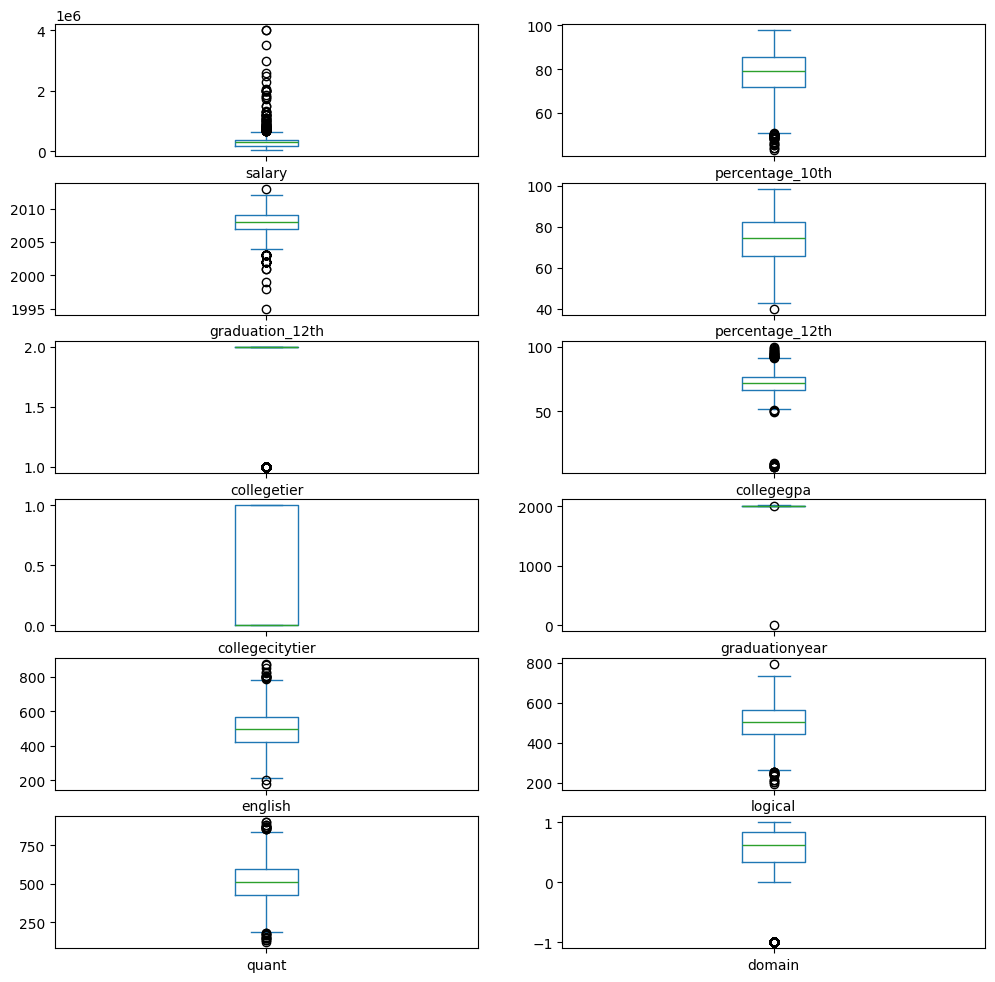

In [26]:
df_numeric.plot(kind='box' , subplots = True , layout = (6,2) , figsize = (12,12))

In [27]:
from feature_engine.outliers import Winsorizer

In [28]:
wins = Winsorizer(capping_method='iqr' , tail='both' , fold=3)
wins.fit(df[['salary']])
df[['salary']] = wins.transform(df[['salary']])

In [29]:
wins = Winsorizer(capping_method='iqr' , tail='both' , fold=2)
wins.fit(df[['collegegpa']])
df[['collegegpa']] = wins.transform(df[['collegegpa']])

In [30]:
df['graduationyear'] = df['graduationyear'].replace(0 , df['graduationyear'].median())

In [31]:
wins = Winsorizer(capping_method='iqr' , tail='both' , fold=1)
wins.fit(df[['graduationyear']])
df[['graduationyear']] = wins.transform(df[['graduationyear']])

### Univaraite Analysis
### Numeric Feature

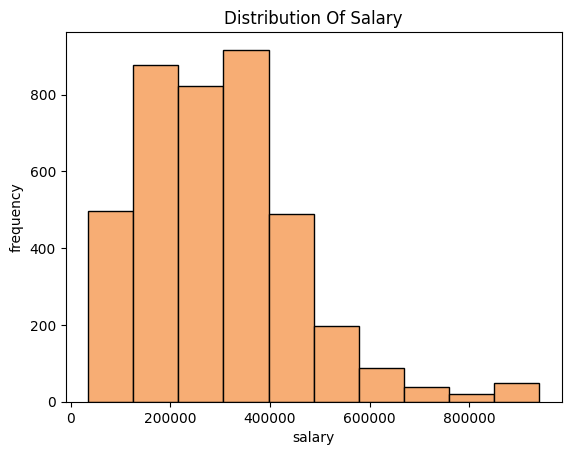

<Figure size 600x400 with 0 Axes>

In [69]:
plt.hist(df['salary'], edgecolor='black' , color='#f7ad74')
plt.title('Distribution Of Salary')
plt.xlabel('salary')
plt.ylabel('frequency')
plt.figure(figsize=(6,4))
plt.show()

**Observation :- Most of the employees getting salaries between 2LPA to 4LPA**

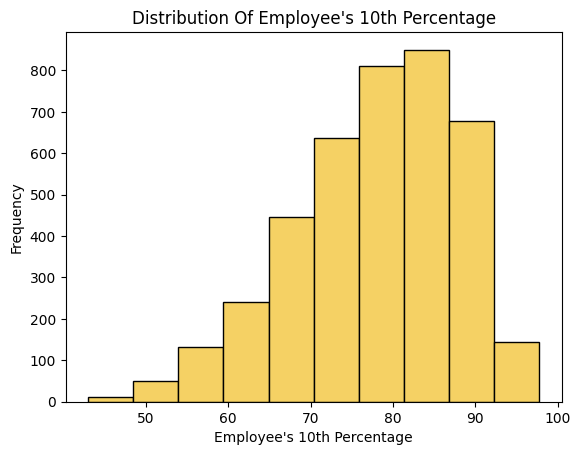

<Figure size 600x400 with 0 Axes>

In [70]:
plt.hist(df['percentage_10th'] , edgecolor='black' , color='#f5d164')
plt.title("Distribution Of Employee's 10th Percentage")
plt.xlabel("Employee's 10th Percentage")
plt.ylabel("Frequency")
plt.figure(figsize=(6,4))
plt.show()

**Observation :- Most of the employees had the 10th Percentage between 75-85%**

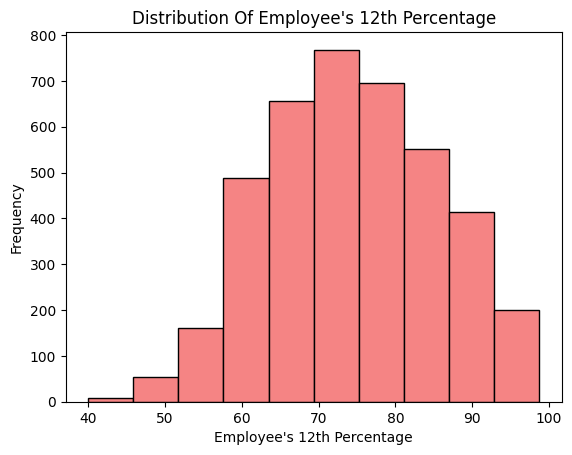

<Figure size 600x400 with 0 Axes>

In [72]:
plt.hist(df['percentage_12th'] , edgecolor='black' , color='#f58484')
plt.title("Distribution Of Employee's 12th Percentage")
plt.xlabel("Employee's 12th Percentage")
plt.ylabel("Frequency")
plt.figure(figsize=(6,4))
plt.show()

**Observation :- Most of the employees had the 12th Percentage between 70-80%**

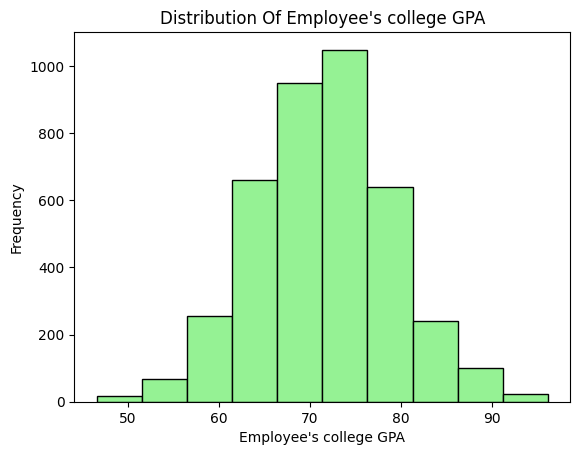

<Figure size 600x400 with 0 Axes>

In [73]:
plt.hist(df['collegegpa'] , edgecolor='black' , color='#95f294')
plt.title("Distribution Of Employee's college GPA")
plt.xlabel("Employee's college GPA")
plt.ylabel("Frequency")
plt.figure(figsize=(6,4))
plt.show()

**Observation :- Most of the employees had the college GPA between 65-75%**

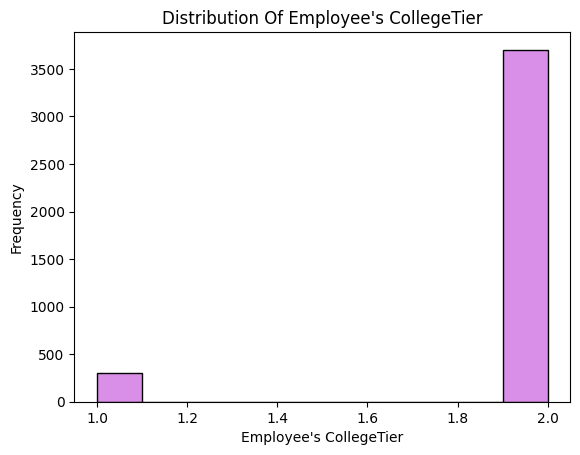

<Figure size 600x400 with 0 Axes>

In [74]:
plt.hist(df['collegetier'] , edgecolor='black' , color='#d98ee8')
plt.title("Distribution Of Employee's CollegeTier")
plt.xlabel("Employee's CollegeTier")
plt.ylabel("Frequency")
plt.figure(figsize=(6,4))
plt.show()

**Observation :- Most of the employees has came from Tier 2 college**

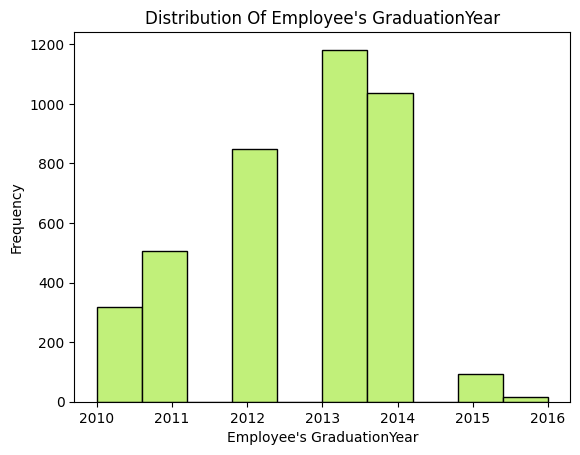

<Figure size 600x400 with 0 Axes>

In [75]:
plt.hist(df['graduationyear'] , edgecolor='black' , color='#c1f07a')
plt.title("Distribution Of Employee's GraduationYear")
plt.xlabel("Employee's GraduationYear")
plt.ylabel("Frequency")
plt.figure(figsize=(6,4))
plt.show()

**Observation :- Most of the employees has completed their graduation in 2013 and 2014**

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

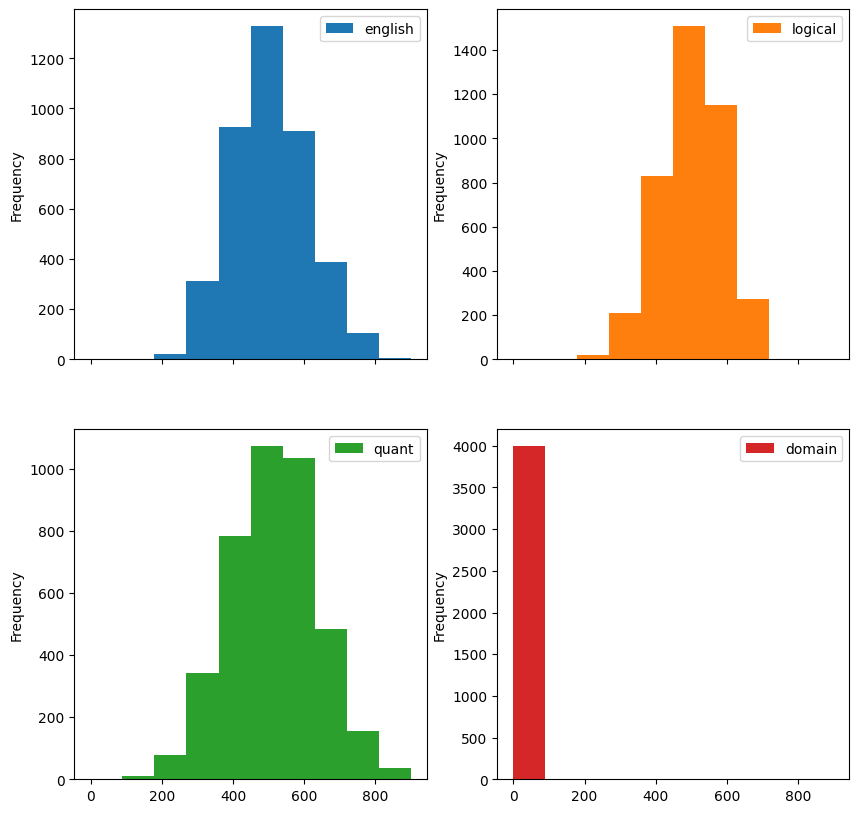

In [38]:
df[['english' , 'logical' , 'quant' , 'domain']].plot(kind = 'hist' , subplots = True , layout = (2,2) , figsize=(10,10))

**Observation :-**
* Most of the employees has 400-600 marks in English.
* Most of the employees has 500-600 marks in Logical.
* Most of the employees has 400-650 marks in Quantative.
* All the employee has only 0-100 marks in Domain.

### Univariate Analysis
### Catogaric Features

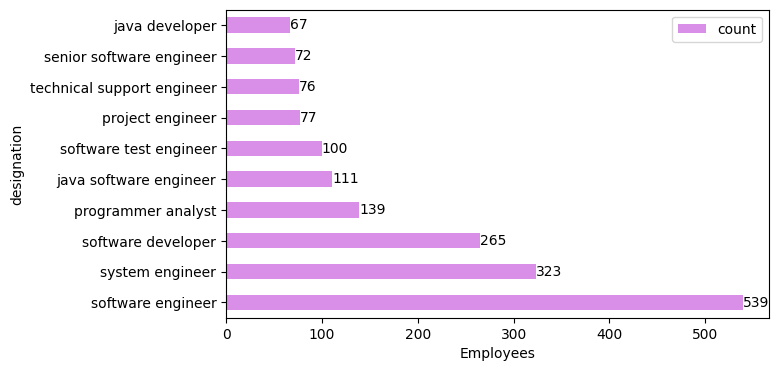

In [76]:
ax = pd.DataFrame(df['designation'].value_counts().nlargest(10)).plot(kind = 'barh' , color='#d98ee8' , figsize = (7,4) ,xlabel = 'Employees')
for i in ax.containers:
    ax.bar_label(i)

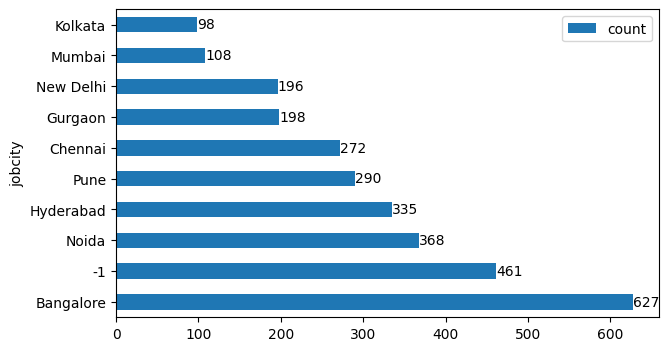

In [40]:
ax = pd.DataFrame(df['jobcity'].value_counts().nlargest(10)).plot(kind = 'barh' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

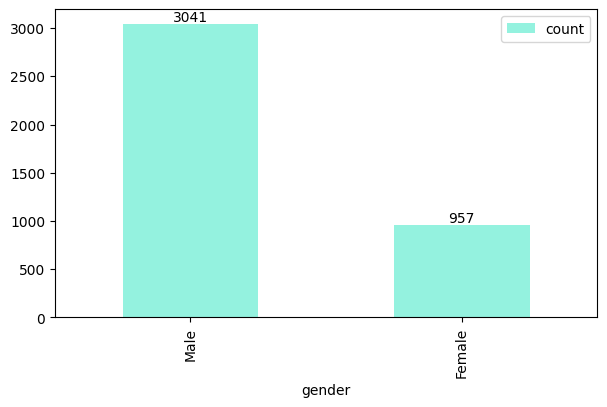

In [41]:
ax = pd.DataFrame(df['gender'].value_counts().nlargest(10)).plot(kind = 'bar' , color='#94f2df' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

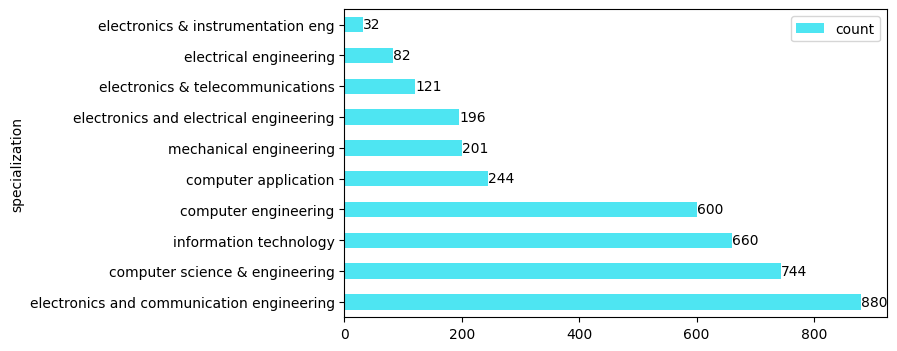

In [42]:
ax = pd.DataFrame(df['specialization'].value_counts().nlargest(10)).plot(kind = 'barh' , color='#4ee5f2' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

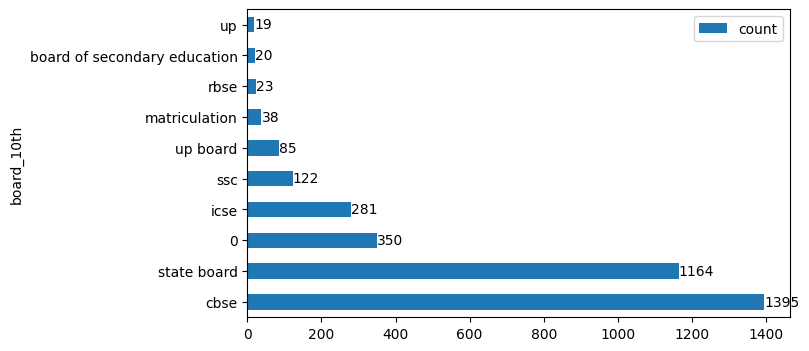

In [77]:
ax = pd.DataFrame(df['board_10th'].value_counts().nlargest(10)).plot(kind = 'barh', figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

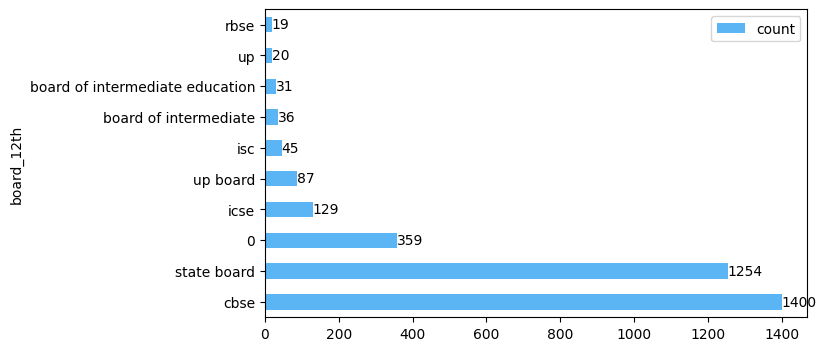

In [44]:
ax = pd.DataFrame(df['board_12th'].value_counts().nlargest(10)).plot(kind = 'barh', color='#5bb5f5' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

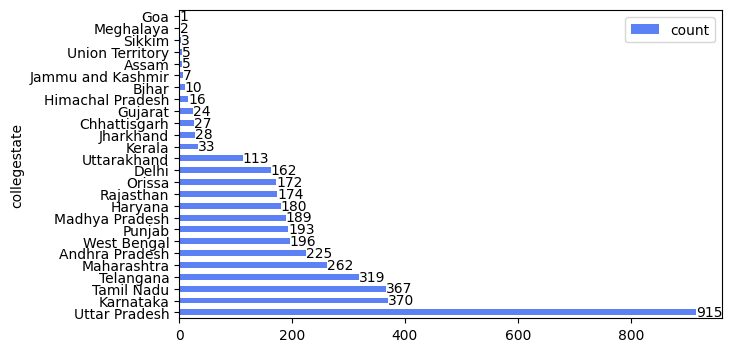

In [45]:
ax = pd.DataFrame(df['collegestate'].value_counts()).plot(kind = 'barh', color='#5b81f5' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

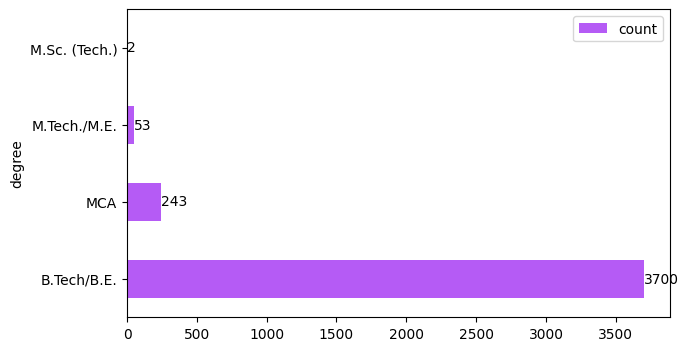

In [46]:
ax = pd.DataFrame(df['degree'].value_counts()).plot(kind = 'barh', color='#b55bf5' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

### Bi-Variate Analaysis
### Categoric Vs Categoric Features

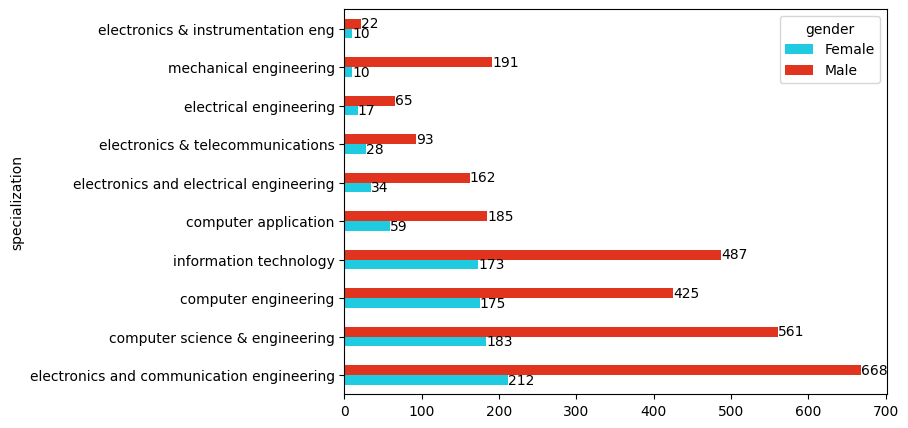

In [47]:
ax = pd.crosstab(df['specialization'] , df['gender']).nlargest(10 ,columns= df['gender']).plot(kind='barh' , color=('#1ECBE1','#E1341E') , figsize=(7,5))
for i in ax.containers:
    ax.bar_label(i)

**Observation :- Most of the employee are came from Electronic and Communication Engg near about 880 in that Male are 668 and Female are 212.**

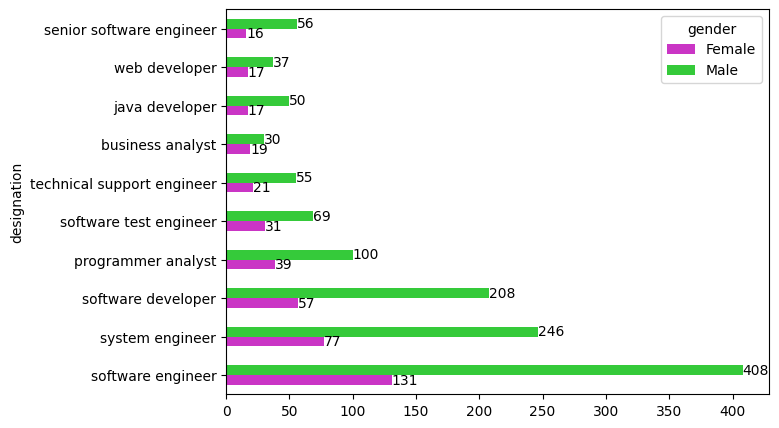

In [48]:
ax = pd.crosstab(df['designation'] , df['gender']).nlargest(10 ,columns= df['gender']).plot(kind='barh' , color=('#CA35C5' , '#35CA3A') , figsize=(7,5))
for i in ax.containers:
    ax.bar_label(i)

**Observation :- Most of the employee are having Software Engg Designation near about 539 in that Male are 408 and Female are 131.**

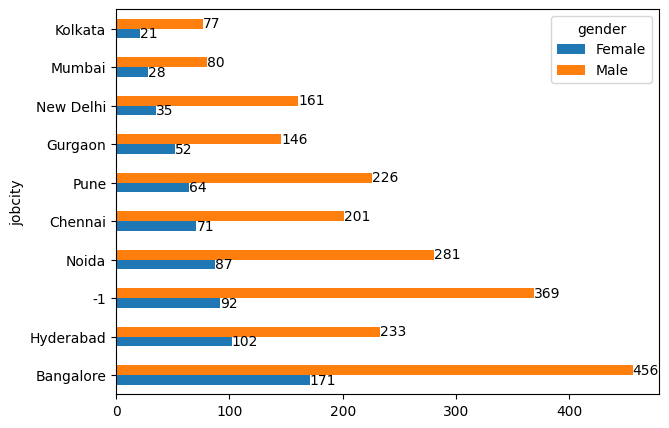

In [49]:
ax = pd.crosstab(df['jobcity'] , df['gender'] ).nlargest(10 ,columns= df['gender']).plot(kind='barh', figsize=(7,5))
for i in ax.containers:
    ax.bar_label(i)

**Observation :- Most of the employee doing job in Banglore near about 647 in that Male are 473 and Female are 174.**

### Bi-Variate Analaysis
### Numeric Vs Numeric Features

<Axes: xlabel='percentage_10th', ylabel='percentage_12th'>

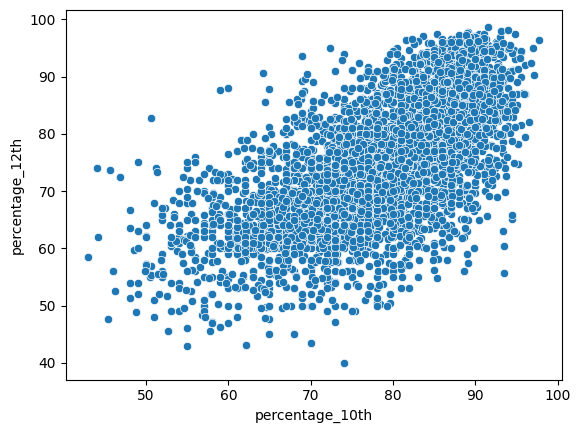

In [52]:
sns.scatterplot(data = df , x = 'percentage_10th' , y = 'percentage_12th')

**Observation :- There is a relationship between 10thPercentage and 12th Percentage of Employee, If 10th Percentage is increasing so 12th percentage is also increased.**

<Axes: xlabel='salary', ylabel='graduationyear'>

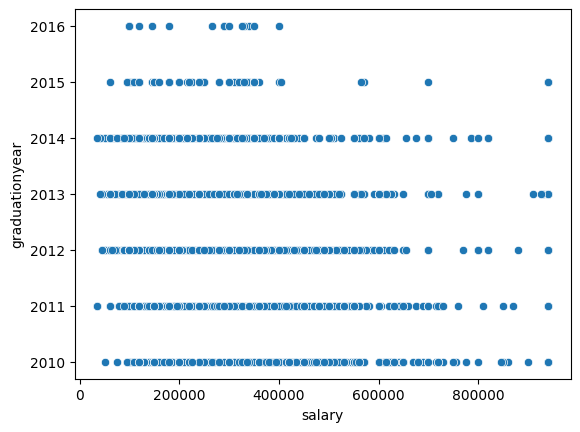

In [82]:
sns.scatterplot(data = df , x = 'salary' , y = 'graduationyear')

<Axes: xlabel='salary', ylabel='collegetier'>

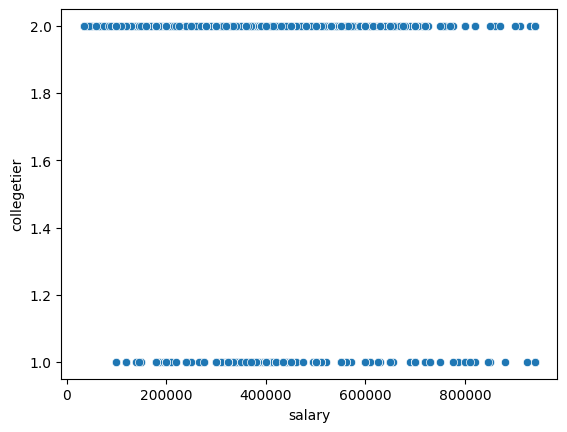

In [53]:
sns.scatterplot(data = df , x = 'salary' , y = 'collegetier')

<Axes: xlabel='salary', ylabel='collegegpa'>

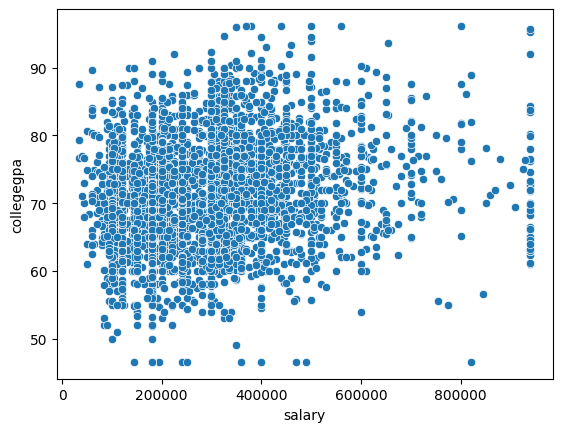

In [54]:
sns.scatterplot(data = df , x = 'salary' , y = 'collegegpa')

<Axes: xlabel='salary', ylabel='english'>

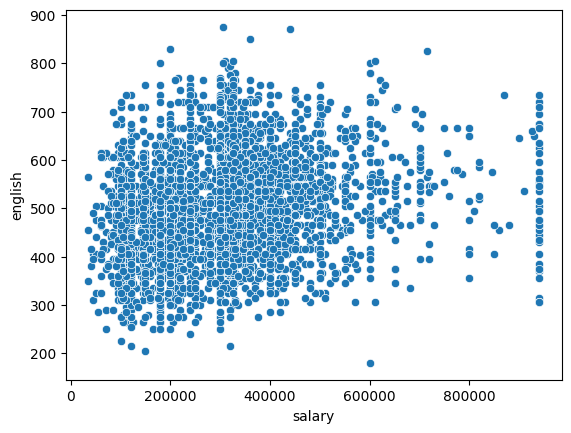

In [56]:
sns.scatterplot(data = df , x = 'salary',  y = 'english')

### Bi-Variate Analaysis
### Catagoric Vs Numeric Features

<Axes: ylabel='designation'>

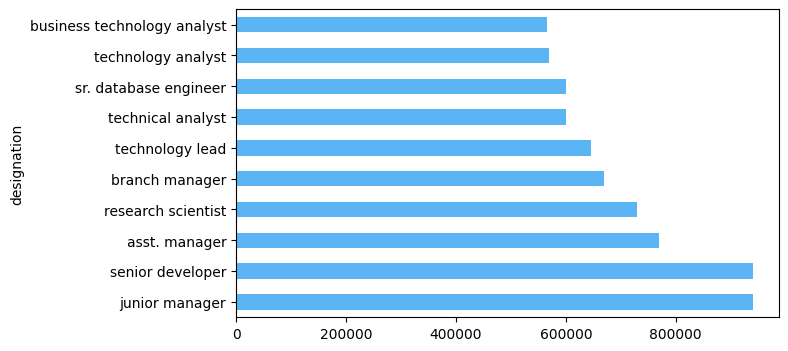

In [57]:
df.groupby('designation')['salary'].mean().sort_values(ascending = False).nlargest(10).plot(kind='barh', color='#5bb5f5' , figsize = (7,4))

**Obseravtion :- Junior manager and senior developer both Designation Getting More salaries as compare to all designations.**

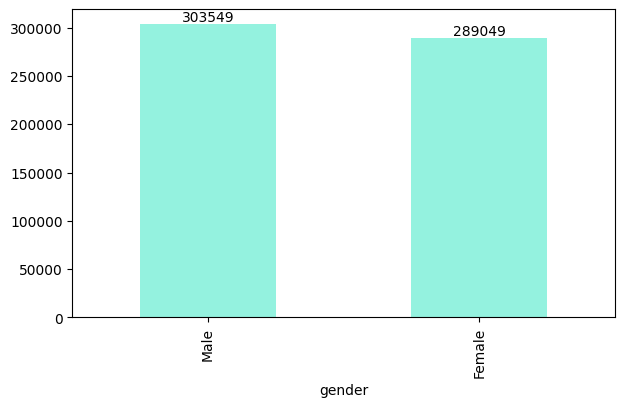

In [58]:
ax = df.groupby('gender')['salary'].mean().sort_values(ascending = False).nlargest(10).plot(kind='bar', color='#94f2df' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Observation :- Female are less than Male but when it come to salaries , Average salary for male is high but female getting near about high salaries.**

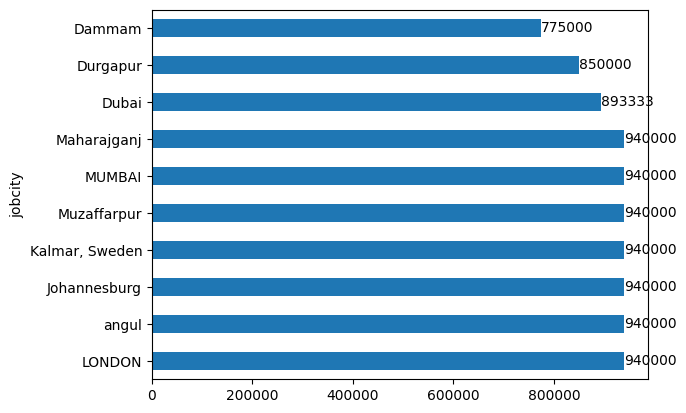

In [59]:
ax = df.groupby('jobcity')['salary'].mean().sort_values(ascending = False).nlargest(10).plot(kind='barh')
for i in ax.containers:
    ax.bar_label(i)

**Observation :- SWEDEN , ANGUL , MUZAFFARPUR , LONDON ,JOHANNESBURG city providing more average salaries to employees.**

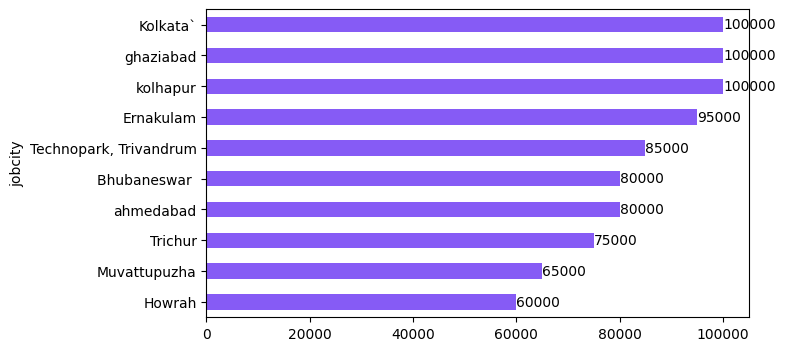

In [61]:
ax = df.groupby('jobcity')['salary'].mean().sort_values(ascending = False).nsmallest(10).plot(kind='barh', color='#865bf5' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

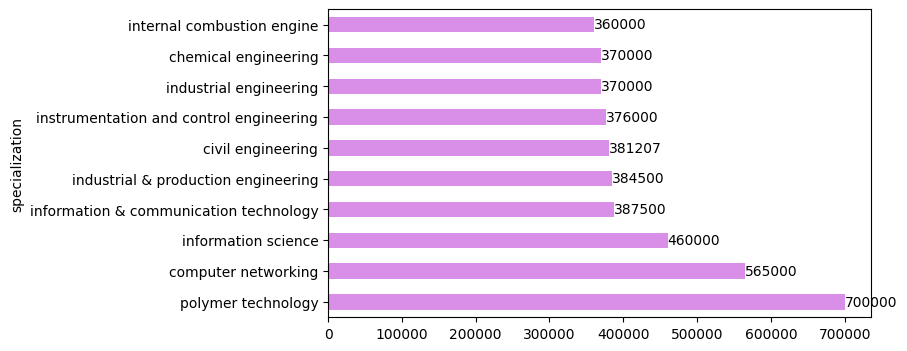

In [62]:
ax = df.groupby('specialization')['salary'].mean().sort_values(ascending = False).nlargest(10).plot(kind='barh' , color='#d98ee8' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

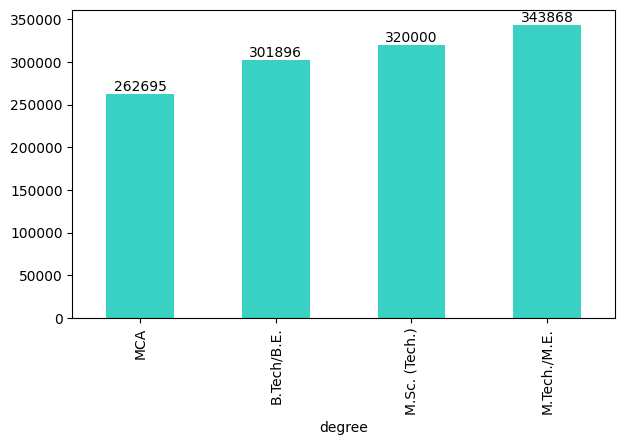

In [63]:
ax = df.groupby('degree')['salary'].mean().sort_values(ascending = False).nsmallest(10).plot(kind='bar', color='#38d1c4' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

### Multi-Variate Analysis

In [64]:
df_numeric.describe()

salary  percentage_10th  graduation_12th  percentage_12th  \
count  3.998000e+03      3998.000000      3998.000000      3998.000000   
mean   3.076998e+05        77.925443      2008.087544        74.466366   
std    2.127375e+05         9.850162         1.653599        10.999933   
min    3.500000e+04        43.000000      1995.000000        40.000000   
25%    1.800000e+05        71.680000      2007.000000        66.000000   
50%    3.000000e+05        79.150000      2008.000000        74.400000   
75%    3.700000e+05        85.670000      2009.000000        82.600000   
max    4.000000e+06        97.760000      2013.000000        98.700000   

       collegetier   collegegpa  collegecitytier  graduationyear      english  \
count  3998.000000  3998.000000      3998.000000     3998.000000  3998.000000   
mean      1.925713    71.486171         0.300400     2012.105803   501.649075   
std       0.262270     8.167338         0.458489       31.857271   104.940021   
min       1.000000     6.450000         0.000000        0.000000   180.000000   
25%       2.000000    66.407500         0.000000     2012.000000   425.000000   
50%       2.000000    71.720000         0.000000     2013.000000   500.000000   
75%       2.000000    76.327500         1.000000     2014.000000   570.000000   
max       2.000000    99.930000         1.000000     2017.000000   875.000000   

           logical        quant       domain  
count  3998.000000  3998.000000  3998.000000  
mean    501.598799   513.378189     0.510490  
std      86.783297   122.302332     0.468671  
min     195.000000   120.000000    -1.000000  
25%     445.000000   430.000000     0.342315  
50%     505.000000   515.000000     0.622643  
75%     565.000000   595.000000     0.842248  
max     795.000000   900.000000     0.999910

In [65]:
df_numeric.corr()

salary  percentage_10th  graduation_12th  percentage_12th  \
salary           1.000000         0.177373        -0.161383         0.170254   
percentage_10th  0.177373         1.000000         0.269957         0.643378   
graduation_12th -0.161383         0.269957         1.000000         0.259166   
percentage_12th  0.170254         0.643378         0.259166         1.000000   
collegetier     -0.179332        -0.126042         0.027691        -0.100771   
collegegpa       0.130103         0.312538         0.086001         0.346137   
collegecitytier  0.015384         0.116707        -0.003016         0.130462   
graduationyear  -0.010053        -0.013799         0.014457        -0.012933   
english          0.178219         0.350780         0.147925         0.212888   
logical          0.179275         0.316014         0.105887         0.243571   
quant            0.230627         0.317640         0.001379         0.312413   
domain           0.104656         0.078563        -0.034163         0.074099   

                 collegetier  collegegpa  collegecitytier  graduationyear  \
salary             -0.179332    0.130103         0.015384       -0.010053   
percentage_10th    -0.126042    0.312538         0.116707       -0.013799   
graduation_12th     0.027691    0.086001        -0.003016        0.014457   
percentage_12th    -0.100771    0.346137         0.130462       -0.012933   
collegetier         1.000000   -0.086781        -0.101494       -0.005557   
collegegpa         -0.086781    1.000000         0.017471        0.008706   
collegecitytier    -0.101494    0.017471         1.000000        0.008152   
graduationyear     -0.005557    0.008706         0.008152        1.000000   
english            -0.183843    0.106478         0.050462       -0.024089   
logical            -0.182811    0.196610         0.020353       -0.024018   
quant              -0.251103    0.217380         0.007896       -0.021781   
domain             -0.061436    0.107252         0.009250       -0.009741   

                  english   logical     quant    domain  
salary           0.178219  0.179275  0.230627  0.104656  
percentage_10th  0.350780  0.316014  0.317640  0.078563  
graduation_12th  0.147925  0.105887  0.001379 -0.034163  
percentage_12th  0.212888  0.243571  0.312413  0.074099  
collegetier     -0.183843 -0.182811 -0.251103 -0.061436  
collegegpa       0.106478  0.196610  0.217380  0.107252  
collegecitytier  0.050462  0.020353  0.007896  0.009250  
graduationyear  -0.024089 -0.024018 -0.021781 -0.009741  
english          1.000000  0.444357  0.375784  0.089721  
logical          0.444357  1.000000  0.500152  0.169453  
quant            0.375784  0.500152  1.000000  0.207108  
domain           0.089721  0.169453  0.207108  1.000000

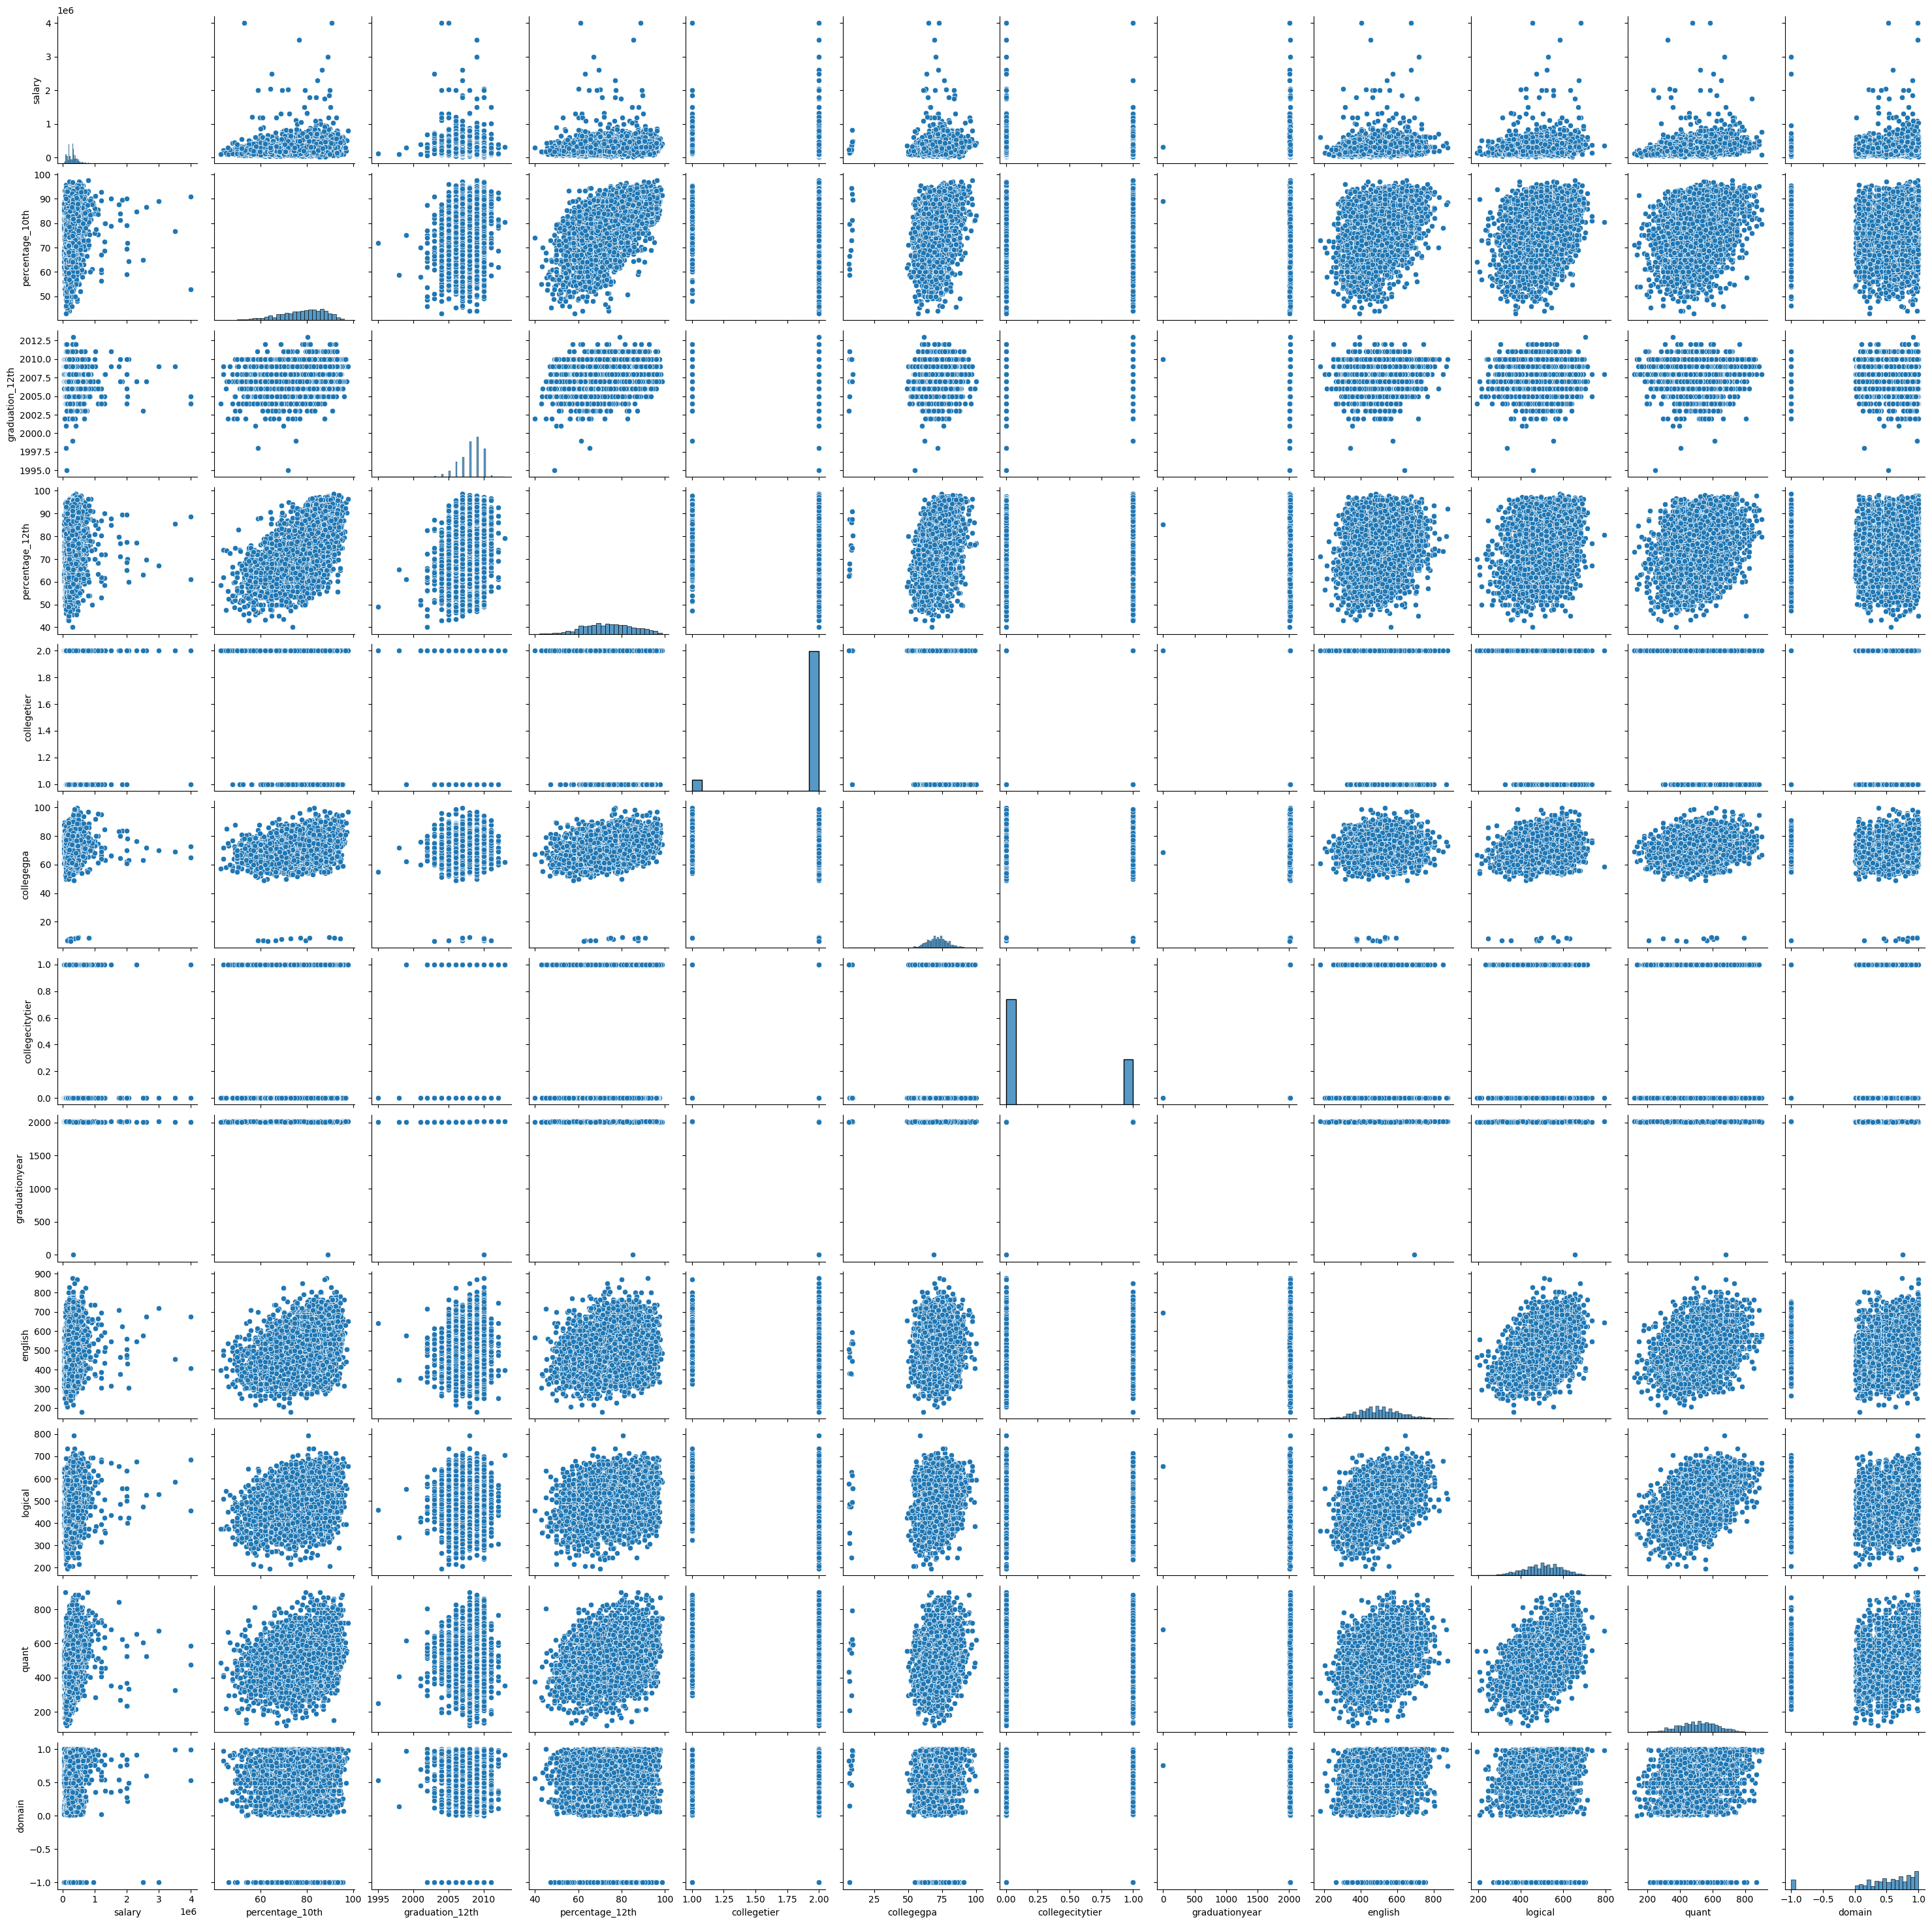

In [66]:
sns.pairplot(df_numeric)

<Axes: >

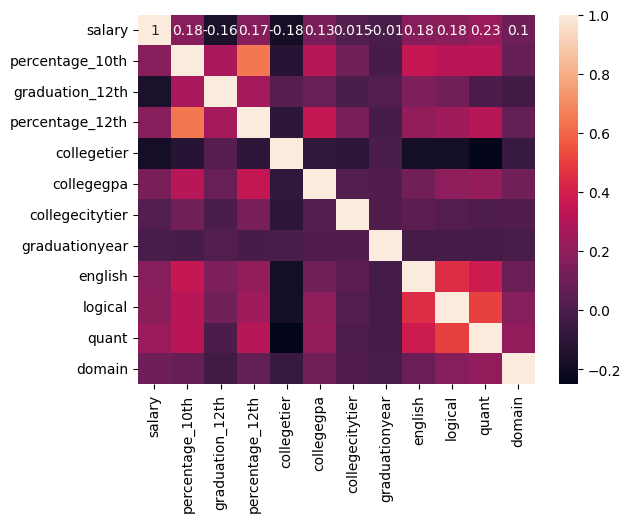

In [67]:
sns.heatmap(df_numeric.corr(numeric_only=True),annot=True)

In [79]:
df.to_csv('AMCAT.csv')